# Unit 5 - Financial Planning

In [123]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [124]:
# Load .env enviroment variables
load_dotenv('enviroment.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [125]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [126]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [127]:
# Fetch current BTC price
# YOUR CODE HERE!

btc_data = requests.get(btc_url).json()
btc_to_usd = btc_data['data']['1']['quotes']['USD']['price']
my_btc_value

# Fetch current ETH price
# YOUR CODE HERE!
eth_data = requests.get(eth_url).json()
eth_to_usd = eth_data['data']['1027']['quotes']['USD']['price']

## Compute current value of my crpto
# YOUR CODE HERE!

my_btc_value = btc_to_usd * my_btc
my_eth_value = eth_to_usd * my_btc



#Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $32968.80
The current value of your 5.3 ETH is $2223.76


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [128]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [129]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
 # YOUR CODE HERE!

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)



In [130]:
# Format current date as ISO format

start_date = pd.Timestamp("2023-04-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-04-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"] 

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

AGG = ticker_data[ticker_data['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = ticker_data[ticker_data['symbol'] == 'SPY'].drop('symbol', axis = 1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

ticker_data = pd.concat([SPY,AGG], axis = 1, keys= ['SPY', 'AGG'])

# Preview DataFrame
# YOUR CODE HERE!

ticker_data

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2023-04-19 04:00:00+00:00  412.22  415.08  412.16  414.14  55252464   

                                                     AGG                       \
                          trade_count        vwap   open   high    low  close   
timestamp                                                                       
2023-04-19 04:00:00+00:00      421201  413.662834  98.89  98.93  98.71  98.89   

                                                           
                            volume trade_count       vwap  
timestamp                                                  
2023-04-19 04:00:00+00:00  3592906       18630  98.843915

In [131]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!


spy_close_price = ticker_data['SPY']['close'][0]
agg_close_price = ticker_data['AGG']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.89
Current SPY closing price: $414.14


In [132]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20707.00
The current value of your 200 AGG shares is $19778.00


### Savings Health Analysis

In [133]:
# Set monthly household income
# YOUR CODE HERE!

monthly_income = 12000


# Consolidate financial assets data
# YOUR CODE HERE!

crypto_total_value = my_btc_value + my_eth_value
shares_total_value = my_spy_value + my_agg_value

# Create savings DataFrame
# YOUR CODE HERE!

df_savings = pd.DataFrame({'Amount' : [shares_total_value, crypto_total_value ]}, index = ['shares', 'crypto'])


# Display savings DataFrame
display(df_savings)

,Amount
shares,40485.000
crypto,35192.556


<Axes: title={'center': 'Savings'}, ylabel='Amount'>

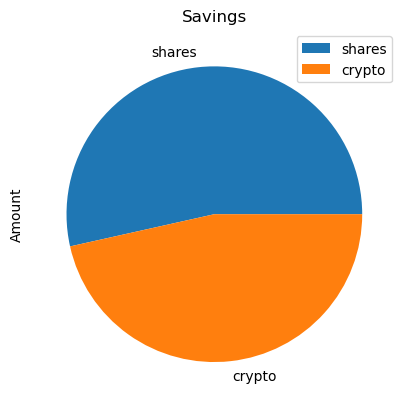

In [134]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie( y = 'Amount', title = 'Savings')

In [135]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

total_savings = shares_total_value + crypto_total_value

# Validate saving health
# YOUR CODE HERE!

if total_savings > emergency_fund:
    print('Congratulations!!! you have enough money in this fund')
elif total_savings == emergency_fund:
    print('Congraltulation!!! you have reached yout financial goal')
else: 
    print(f'you are still {emergency_fund - total_savings} away from reaching your goal')

Congratulations!!! you have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [136]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-04-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-04-19', tz='America/New_York').isoformat()

In [174]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

historical_data = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

spy_historical_data = historical_data[historical_data['symbol'] == 'SPY'].drop('symbol' , axis= 1)
agg_historical_data = historical_data[historical_data['symbol'] == 'AGG'].drop('symbol' , axis= 1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_stock_data = pd.concat([spy_historical_data, agg_historical_data], axis =1 , keys = ["SPY", "AGG"], sort= True)

# Display sample data
df_stock_data


SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2018-04-19 04:00:00+00:00  269.65  269.8800  267.7200  268.87   77712909   
2018-04-20 04:00:00+00:00  268.81  269.0600  265.6100  266.66  100513533   
2018-04-23 04:00:00+00:00  267.25  267.8900  265.3500  266.57   67445593   
2018-04-24 04:00:00+00:00  267.73  267.9762  261.2800  263.04  113999454   
2018-04-25 04:00:00+00:00  262.91  264.1300  260.8500  263.63  103943848   
...                           ...       ...       ...     ...        ...   
2023-04-13 04:00:00+00:00  409.18  413.8400  407.9922  413.47   85814754   
2023-04-14 04:00:00+00:00  412.81  415.0900  410.0600  412.46   75973321   
2023-04-17 04:00:00+00:00  412.37  413.9600  411.0850  413.94   66447057   
2023-04-18 04:00:00+00:00  415.58  415.7200  412.7802  414.21   63567329   
2023-04-19 04:00:00+00:00  412.22  415.0800  412.1600  414.14   55252464   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2018-04-19 04:00:00+00:00      284593  268.787580  106.34  106.3899  106.240   
2018-04-20 04:00:00+00:00      292033  267.286647  106.15  106.2400  106.000   
2018-04-23 04:00:00+00:00      239522  266.670829  105.98  106.0100  105.900   
2018-04-24 04:00:00+00:00      436187  264.147131  105.85  105.9200  105.780   
2018-04-25 04:00:00+00:00      356769  262.812073  105.72  105.7400  105.600   
...                               ...         ...     ...       ...      ...   
2023-04-13 04:00:00+00:00      566796  411.717306  100.16  100.2677   99.805   
2023-04-14 04:00:00+00:00      573427  412.263399   99.56   99.5900   99.320   
2023-04-17 04:00:00+00:00      478342  412.589811   99.13   99.1750   98.880   
2023-04-18 04:00:00+00:00      493414  414.073765   98.91   99.1600   98.910   
2023-04-19 04:00:00+00:00      421201  413.662834   98.89   98.9300   98.710   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-04-19 04:00:00+00:00  106.29  10985057       20047  106.302239  
2018-04-20 04:00:00+00:00  106.00   2766030       11007  106.117094  
2018-04-23 04:00:00+00:00  105.95   2620804       11475  105.953540  
2018-04-24 04:00:00+00:00  105.81   3442319       16110  105.846798  
2018-04-25 04:00:00+00:00  105.67   3984953       13988  105.715560  
...                           ...       ...         ...         ...  
2023-04-13 04:00:00+00:00   99.89   3964799       18405   99.967812  
2023-04-14 04:00:00+00:00   99.40   4503010       19909   99.405533  
2023-04-17 04:00:00+00:00   98.90   4441277       18511   98.944350  
2023-04-18 04:00:00+00:00   99.04   4753038       17653   99.022777  
2023-04-19 04:00:00+00:00   98.89   3592906       18630   98.843915  

[1259 rows x 14 columns]

In [167]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

mc_30_year_simulation = MCSimulation(
    portfolio_data= df_stock_data,
    weights= [.60 ,.40],
    num_simulation= 500,
    num_trading_days=  252 * 30
)


In [159]:
# Printing the simulation input data
# YOUR CODE HERE!

mc_30_year_simulation

In [168]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

mc_30_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 110.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 120.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 130.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 140.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 150.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 160.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 170.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 180.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 190.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 200.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 210.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 220.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 230.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 240.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 250.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 260.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 270.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 280.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 290.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 300.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 310.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 320.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 330.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 340.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 350.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 360.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 370.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 380.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 390.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 400.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 410.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 420.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 430.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 440.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 450.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 460.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 470.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 480.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

Running Monte Carlo simulation number 490.


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starte

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995522,1.001473,1.008164,0.995839,0.993713,1.001310,0.991341,0.991949,1.005791,0.988996,...,0.992465,0.994001,1.010256,0.993113,0.995128,1.010158,0.995895,1.008409,1.000709,0.998986
2,0.997539,1.004128,1.002380,1.015209,0.983249,0.997343,0.988068,0.999087,1.013298,1.001602,...,1.006027,0.998472,1.008905,0.996333,1.003126,0.989811,1.000929,1.008384,0.992146,1.003690
3,0.997347,1.021213,0.998321,1.015198,0.999071,0.997893,0.991160,0.993142,1.001272,0.999844,...,1.006957,1.002316,1.012848,1.007849,1.011761,0.989605,1.007811,1.011748,0.994614,1.004623
4,0.985446,1.018425,0.995299,1.001308,1.005965,0.992671,1.000531,0.984453,1.008569,1.002672,...,1.010198,0.995535,1.014475,1.008130,1.002781,0.994443,0.998861,1.019031,0.993225,0.998639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.434731,5.672035,3.381767,6.909680,4.186728,2.909214,9.550868,6.984391,5.022466,4.413793,...,8.336043,3.236507,10.390597,2.497147,6.824671,8.275186,4.419897,1.487310,3.657962,11.914504
7557,3.441884,5.653221,3.351998,6.871329,4.221304,2.881462,9.443158,7.066296,5.080249,4.396015,...,8.418714,3.237173,10.441309,2.518746,6.862869,8.164969,4.460605,1.498849,3.659476,11.808867
7558,3.403336,5.634818,3.360282,6.949186,4.178260,2.883704,9.457098,7.044327,5.091211,4.412719,...,8.402334,3.209773,10.377755,2.542742,6.927393,8.160108,4.451481,1.488966,3.690314,11.798891
7559,3.364053,5.648951,3.369728,6.987990,4.157638,2.936880,9.431365,6.966509,5.101135,4.382083,...,8.425982,3.175279,10.312412,2.540117,6.992411,8.071916,4.463703,1.494823,3.710531,11.608838


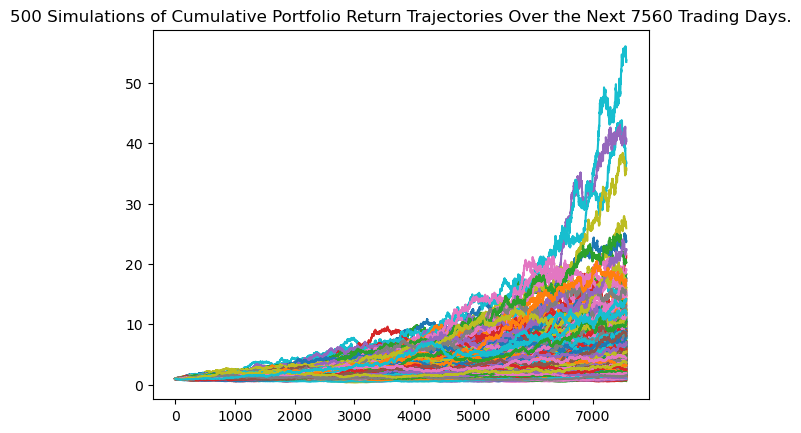

In [170]:
# Plot simulation outcomes
# YOUR CODE HERE
line_plot = mc_30_year_simulation.plot_simulation().plot(figsize = (20,20))

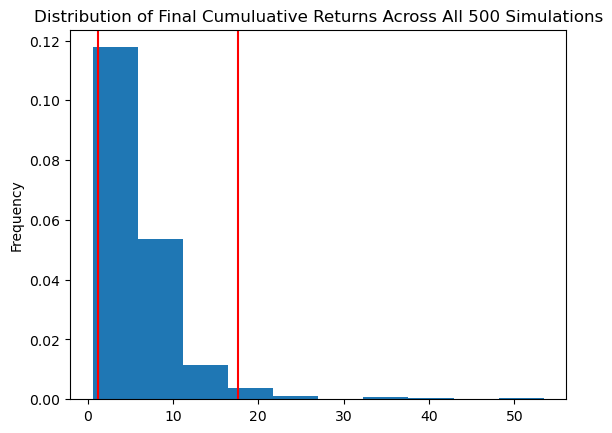

In [171]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

distribution_plot =  mc_30_year_simulation.plot_distribution()

### Retirement Analysis

In [176]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

summary_statistics = mc_30_year_simulation.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(summary_statistics)



count           500.000000
mean              5.995626
std               5.180717
min               0.616397
25%               2.851112
50%               4.600690
75%               7.871760
max              53.441953
95% CI Lower      1.184592
95% CI Upper     17.626261
Name: 7560, dtype: float64


/Users/miguelmunoz/Downloads/Fintech_bootcamp/Fiancial_Planner/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [180]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

upper_95_ci = summary_statistics[8]
lower_95_ci = summary_statistics[9]

ci_upper = initial_investment * upper_95_ci
ci_lower = initial_investment * lower_95_ci



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $352525.21737658896 and $23691.83023018056


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

mc_5_years_simulation = MCSimulation(
    
    portfolio_data= df_stock_data,
    weights= [.60 ,.40],
    num_simulation= 500,
    num_trading_days=  252 * 5

)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")